# Imports and function definitions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import glob
import time
%matplotlib inline
mpl.style.use('default')

def read_10s_data():
    """
    Reads in the file paths and dwelling id's of the smartmeter data.
    :return: file_paths, dwelling_ids, both as lists.
    """
    path = '//datc//opschaler//combined_gas_smart_weather_dfs//processed'
    file_paths = np.array(glob.glob(path + "/*_10s.csv"))

    print('Detected %s files.' % len(file_paths))
    dwelling_ids = np.array(list((map(lambda x: x[-19:-8], file_paths))))

    return file_paths, dwelling_ids

def read_hour_data():
    """
    Reads in the file paths and dwelling id's of the smartmeter data.
    :return: file_paths, dwelling_ids, both as lists.
    """
    path = '//datc//opschaler//combined_gas_smart_weather_dfs//processed'
    file_paths = np.array(glob.glob(path + "/*_hour.csv"))

    print('Detected %s files.' % len(file_paths))
    dwelling_ids = np.array(list((map(lambda x: x[-20:-9], file_paths))))

    return file_paths, dwelling_ids

def create_corr_matrix(df, dwelling_id, method, detailed):
    """
    Pearson correlation coefficient matrix. 
    The Pearson correlation coefficient is a measure of the linear correlation between two variables.
    
    Some correlations appear as NaN, this is because their std is 0.
    See: https://stackoverflow.com/questions/52466844/pandas-corr-returning-nan-too-often
    """
    plt.clf()
    
    corr = s.corr(method=method)
    print('Corr contains %s NaNs ' % corr.isnull().sum().sum())
    mask = np.zeros_like(s.corr())
    mask[np.triu_indices_from(mask)] = True

    if detailed:
        fig, ax = plt.subplots(figsize=(25,25))
        dir = '//datc//opschaler//EDA//correlation_matrices//'+method+'//detailed//'
    else:
        fig, ax = plt.subplots()
        dir = '//datc//opschaler//EDA//correlation_matrices//'
    try:
        fig = sns.heatmap(corr, mask=mask, square=False, cmap='RdYlGn', annot=detailed, ax=ax, vmin=-1, vmax=1,cbar_kws={'label':method+'correlation coefficient [-]'})
        
        cbar = fig.collections[0].colorbar
        cbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
        fig.set_title('Correlation matrix of dwelling ID: '+dwelling_id)
        fig.tick_params(axis='x', rotation=90)
        fig.tick_params(axis='y', rotation=0)

        fig = fig.get_figure()
        fig.tight_layout()
        fig.show()
        fig.savefig(dir + dwelling_id + '.png', dpi=300)
        
    except:
        print('Could not sns.heatmap: '+method)
    
    return

# Read the file paths and dwelling IDs

In [2]:
file_paths_10s, dwelling_ids_10s = read_10s_data()

Detected 38 files.


In [3]:
dwelling_ids_10s

array(['P01S01W7548', 'P01S01W8239', 'P01S01W5588', 'P01S02W5065',
       'P01S02W4827', 'P01S01W4589', 'P01S01W5476', 'P01S01W0001',
       'P01S01W7071', 'P01S01W3497', 'P01S02W4953', 'P01S01W5040',
       'P01S01W9431', 'P01S01W6495', 'P01S01W4489', 'P01S01W8171',
       'P01S01W4002', 'P01S01W5564', 'P01S02W0167', 'P01S01W6595',
       'P01S01W0373', 'P01S02W2995', 'P01S01W8655', 'P01S01W6271',
       'P01S01W5292', 'P01S01W6959', 'P01S01W4979', 'P01S01W4313',
       'P01S01W5855', 'P01S01W2581', 'P01S01W4569', 'P01S01W1341',
       'P01S01W7042', 'P01S01W6835', 'P01S01W0998', 'P01S01W1347',
       'P01S01W5339', 'P01S01W4091'], 
      dtype='<U11')

In [4]:
file_paths_hour, dwelling_ids_hour = read_hour_data()

Detected 38 files.


In [5]:
dwelling_ids_hour

array(['P01S01W7548', 'P01S02W0167', 'P01S01W5040', 'P01S01W5588',
       'P01S01W9431', 'P01S01W4002', 'P01S01W7042', 'P01S01W5476',
       'P01S02W4827', 'P01S01W6271', 'P01S01W5339', 'P01S01W1341',
       'P01S01W5564', 'P01S01W2581', 'P01S01W5292', 'P01S01W8655',
       'P01S01W0998', 'P01S01W4979', 'P01S01W6959', 'P01S01W4091',
       'P01S01W0373', 'P01S02W4953', 'P01S01W6595', 'P01S01W4489',
       'P01S01W5855', 'P01S01W4313', 'P01S01W6835', 'P01S01W8239',
       'P01S01W1347', 'P01S01W8171', 'P01S01W7071', 'P01S01W3497',
       'P01S01W6495', 'P01S02W2995', 'P01S01W4589', 'P01S01W0001',
       'P01S01W4569', 'P01S02W5065'], 
      dtype='<U11')

# Iterate over the hour dwellings

Detected 38 files.
---------- iteration 0 out of 38 ----------
Selected dwelling_ID: P01S01W7548
Corr contains 129 NaNs 


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Corr contains 129 NaNs 
Corr contains 126 NaNs 
Corr contains 126 NaNs 
Corr contains 129 NaNs 
Corr contains 129 NaNs 
---------- iteration 1 out of 38 ----------
Selected dwelling_ID: P01S02W0167
Corr contains 129 NaNs 
Corr contains 129 NaNs 
Corr contains 126 NaNs 
Corr contains 126 NaNs 
Corr contains 129 NaNs 
Corr contains 129 NaNs 
---------- iteration 2 out of 38 ----------
Selected dwelling_ID: P01S01W5040
Corr contains 129 NaNs 
Corr contains 129 NaNs 
Corr contains 126 NaNs 
Corr contains 126 NaNs 
Corr contains 129 NaNs 
Corr contains 129 NaNs 
---------- iteration 3 out of 38 ----------
Selected dwelling_ID: P01S01W5588
Corr contains 129 NaNs 
Corr contains 129 NaNs 


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Corr contains 126 NaNs 
Corr contains 126 NaNs 
Corr contains 129 NaNs 
Corr contains 129 NaNs 
---------- iteration 4 out of 38 ----------
Selected dwelling_ID: P01S01W9431
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
---------- iteration 5 out of 38 ----------
Selected dwelling_ID: P01S01W4002
Corr contains 129 NaNs 
Corr contains 129 NaNs 
Corr contains 126 NaNs 
Corr contains 126 NaNs 
Corr contains 129 NaNs 
Corr contains 129 NaNs 
---------- iteration 6 out of 38 ----------
Selected dwelling_ID: P01S01W7042
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
---------- iteration 7 out of 38 ----------
Selected dwelling_ID: P01S01W5476
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
---------- iteration 8 out of 38 ----------
Selected

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

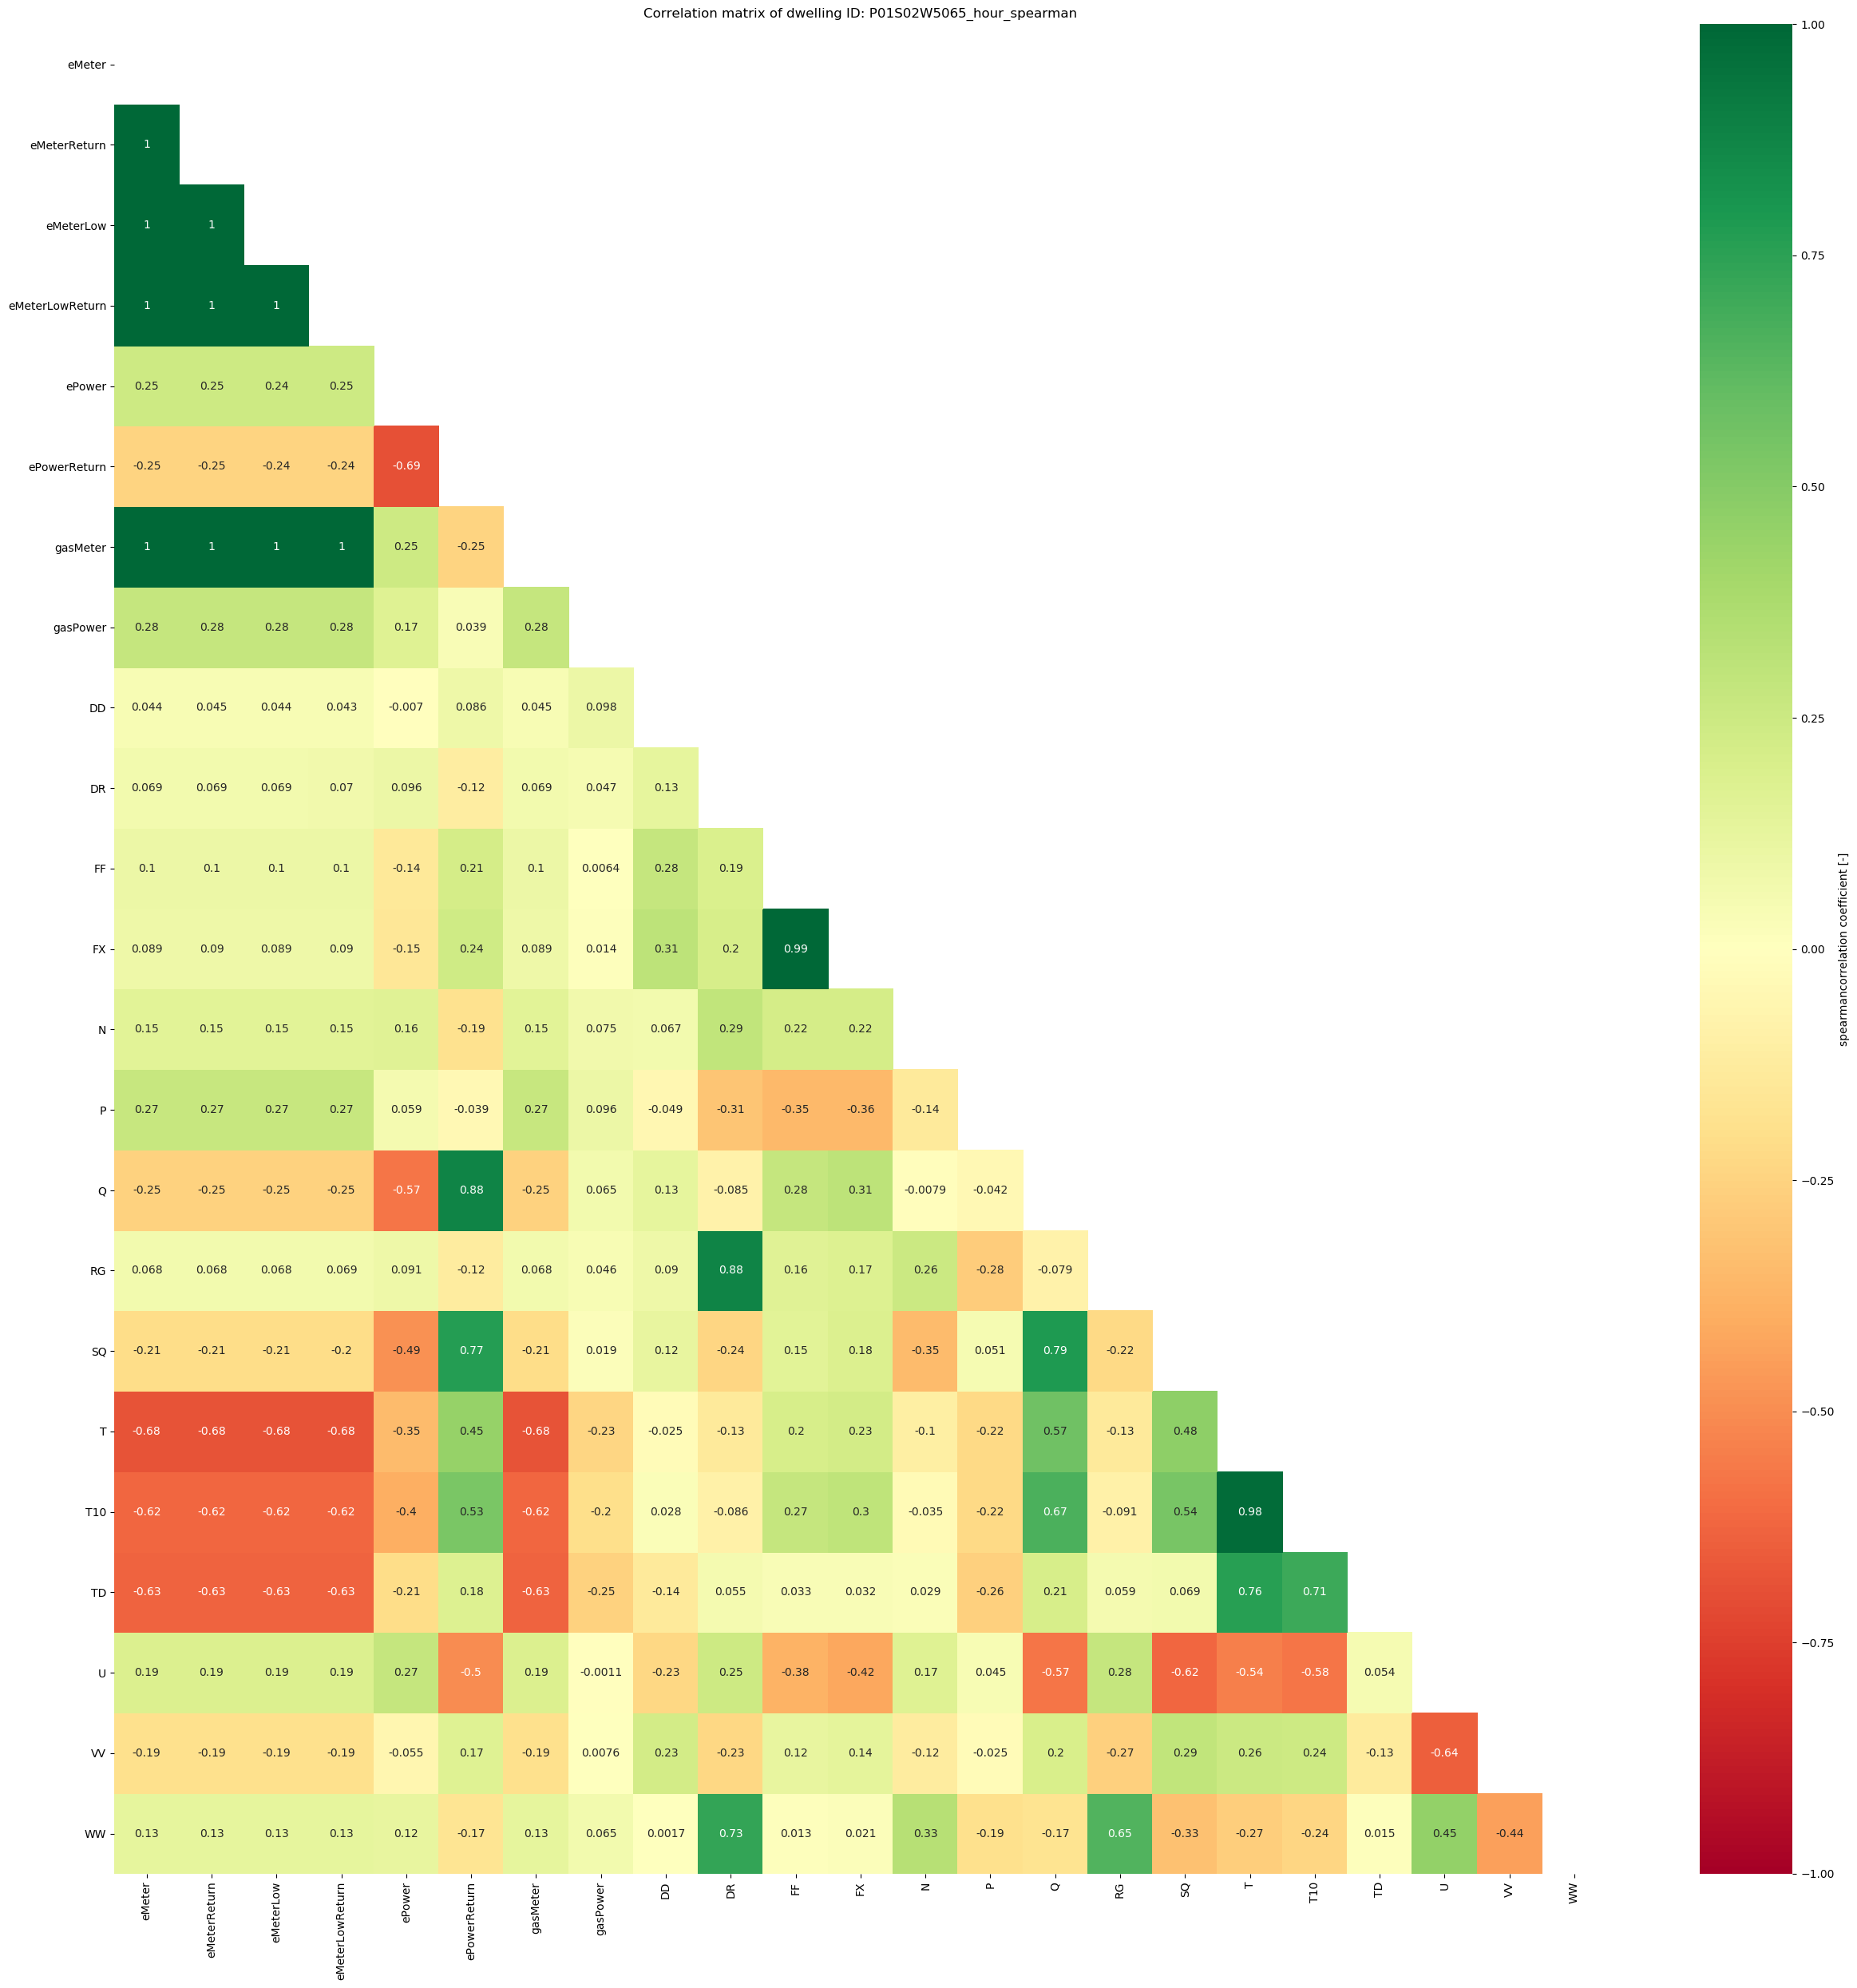

In [6]:
t1 = time.time()

file_paths, dwelling_ids = read_hour_data()
#dwelling_ids = dwelling_ids[34:35]

for i, dwelling in enumerate(dwelling_ids):
    print('---------- iteration %s out of %s ----------' % (i, len(dwelling_ids_hour)))
    dwelling_id = dwelling_ids[i]
    file_path = file_paths[i]
    
    print('Selected dwelling_ID: '+dwelling_id)
    s = pd.read_csv(file_path, delimiter='\t', parse_dates=['datetime'])
    s = s.set_index(['datetime'])
    
    # Do stuff from here on, for example apply the create_corr_matrix() function.
    create_corr_matrix(s, dwelling_id+'_hour_pearson', 'pearson', False)
    create_corr_matrix(s, dwelling_id+'_hour_pearson', 'pearson', True)
    
    create_corr_matrix(s, dwelling_id+'_hour_kendall', 'kendall', False)
    create_corr_matrix(s, dwelling_id+'_hour_kendall', 'kendall', True)
    
    create_corr_matrix(s, dwelling_id+'_hour_spearman', 'spearman', False)
    create_corr_matrix(s, dwelling_id+'_hour_spearman', 'spearman', True)

t2 = time.time()
print('---------- Finished in %.1f [s]' % (t2-t1))

# Iterate over the 10s dwellings

Detected 38 files.
---------- iteration 0 out of 38 ----------
Selected dwelling_ID: P01S01W7548
Corr contains 129 NaNs 


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Corr contains 129 NaNs 
Corr contains 126 NaNs 
Corr contains 126 NaNs 
Corr contains 129 NaNs 
Corr contains 129 NaNs 
---------- iteration 1 out of 38 ----------
Selected dwelling_ID: P01S02W0167
Corr contains 129 NaNs 
Corr contains 129 NaNs 
Corr contains 126 NaNs 
Corr contains 126 NaNs 
Corr contains 129 NaNs 
Corr contains 129 NaNs 
---------- iteration 2 out of 38 ----------
Selected dwelling_ID: P01S01W5040
Corr contains 129 NaNs 
Corr contains 129 NaNs 
Corr contains 126 NaNs 
Corr contains 126 NaNs 
Corr contains 129 NaNs 
Corr contains 129 NaNs 
---------- iteration 3 out of 38 ----------
Selected dwelling_ID: P01S01W5588
Corr contains 129 NaNs 
Corr contains 129 NaNs 


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Corr contains 126 NaNs 
Corr contains 126 NaNs 
Corr contains 129 NaNs 
Corr contains 129 NaNs 
---------- iteration 4 out of 38 ----------
Selected dwelling_ID: P01S01W9431
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
---------- iteration 5 out of 38 ----------
Selected dwelling_ID: P01S01W4002
Corr contains 129 NaNs 
Corr contains 129 NaNs 
Corr contains 126 NaNs 
Corr contains 126 NaNs 
Corr contains 129 NaNs 
Corr contains 129 NaNs 
---------- iteration 6 out of 38 ----------
Selected dwelling_ID: P01S01W7042
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
---------- iteration 7 out of 38 ----------
Selected dwelling_ID: P01S01W5476
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
Corr contains 0 NaNs 
---------- iteration 8 out of 38 ----------
Selected

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

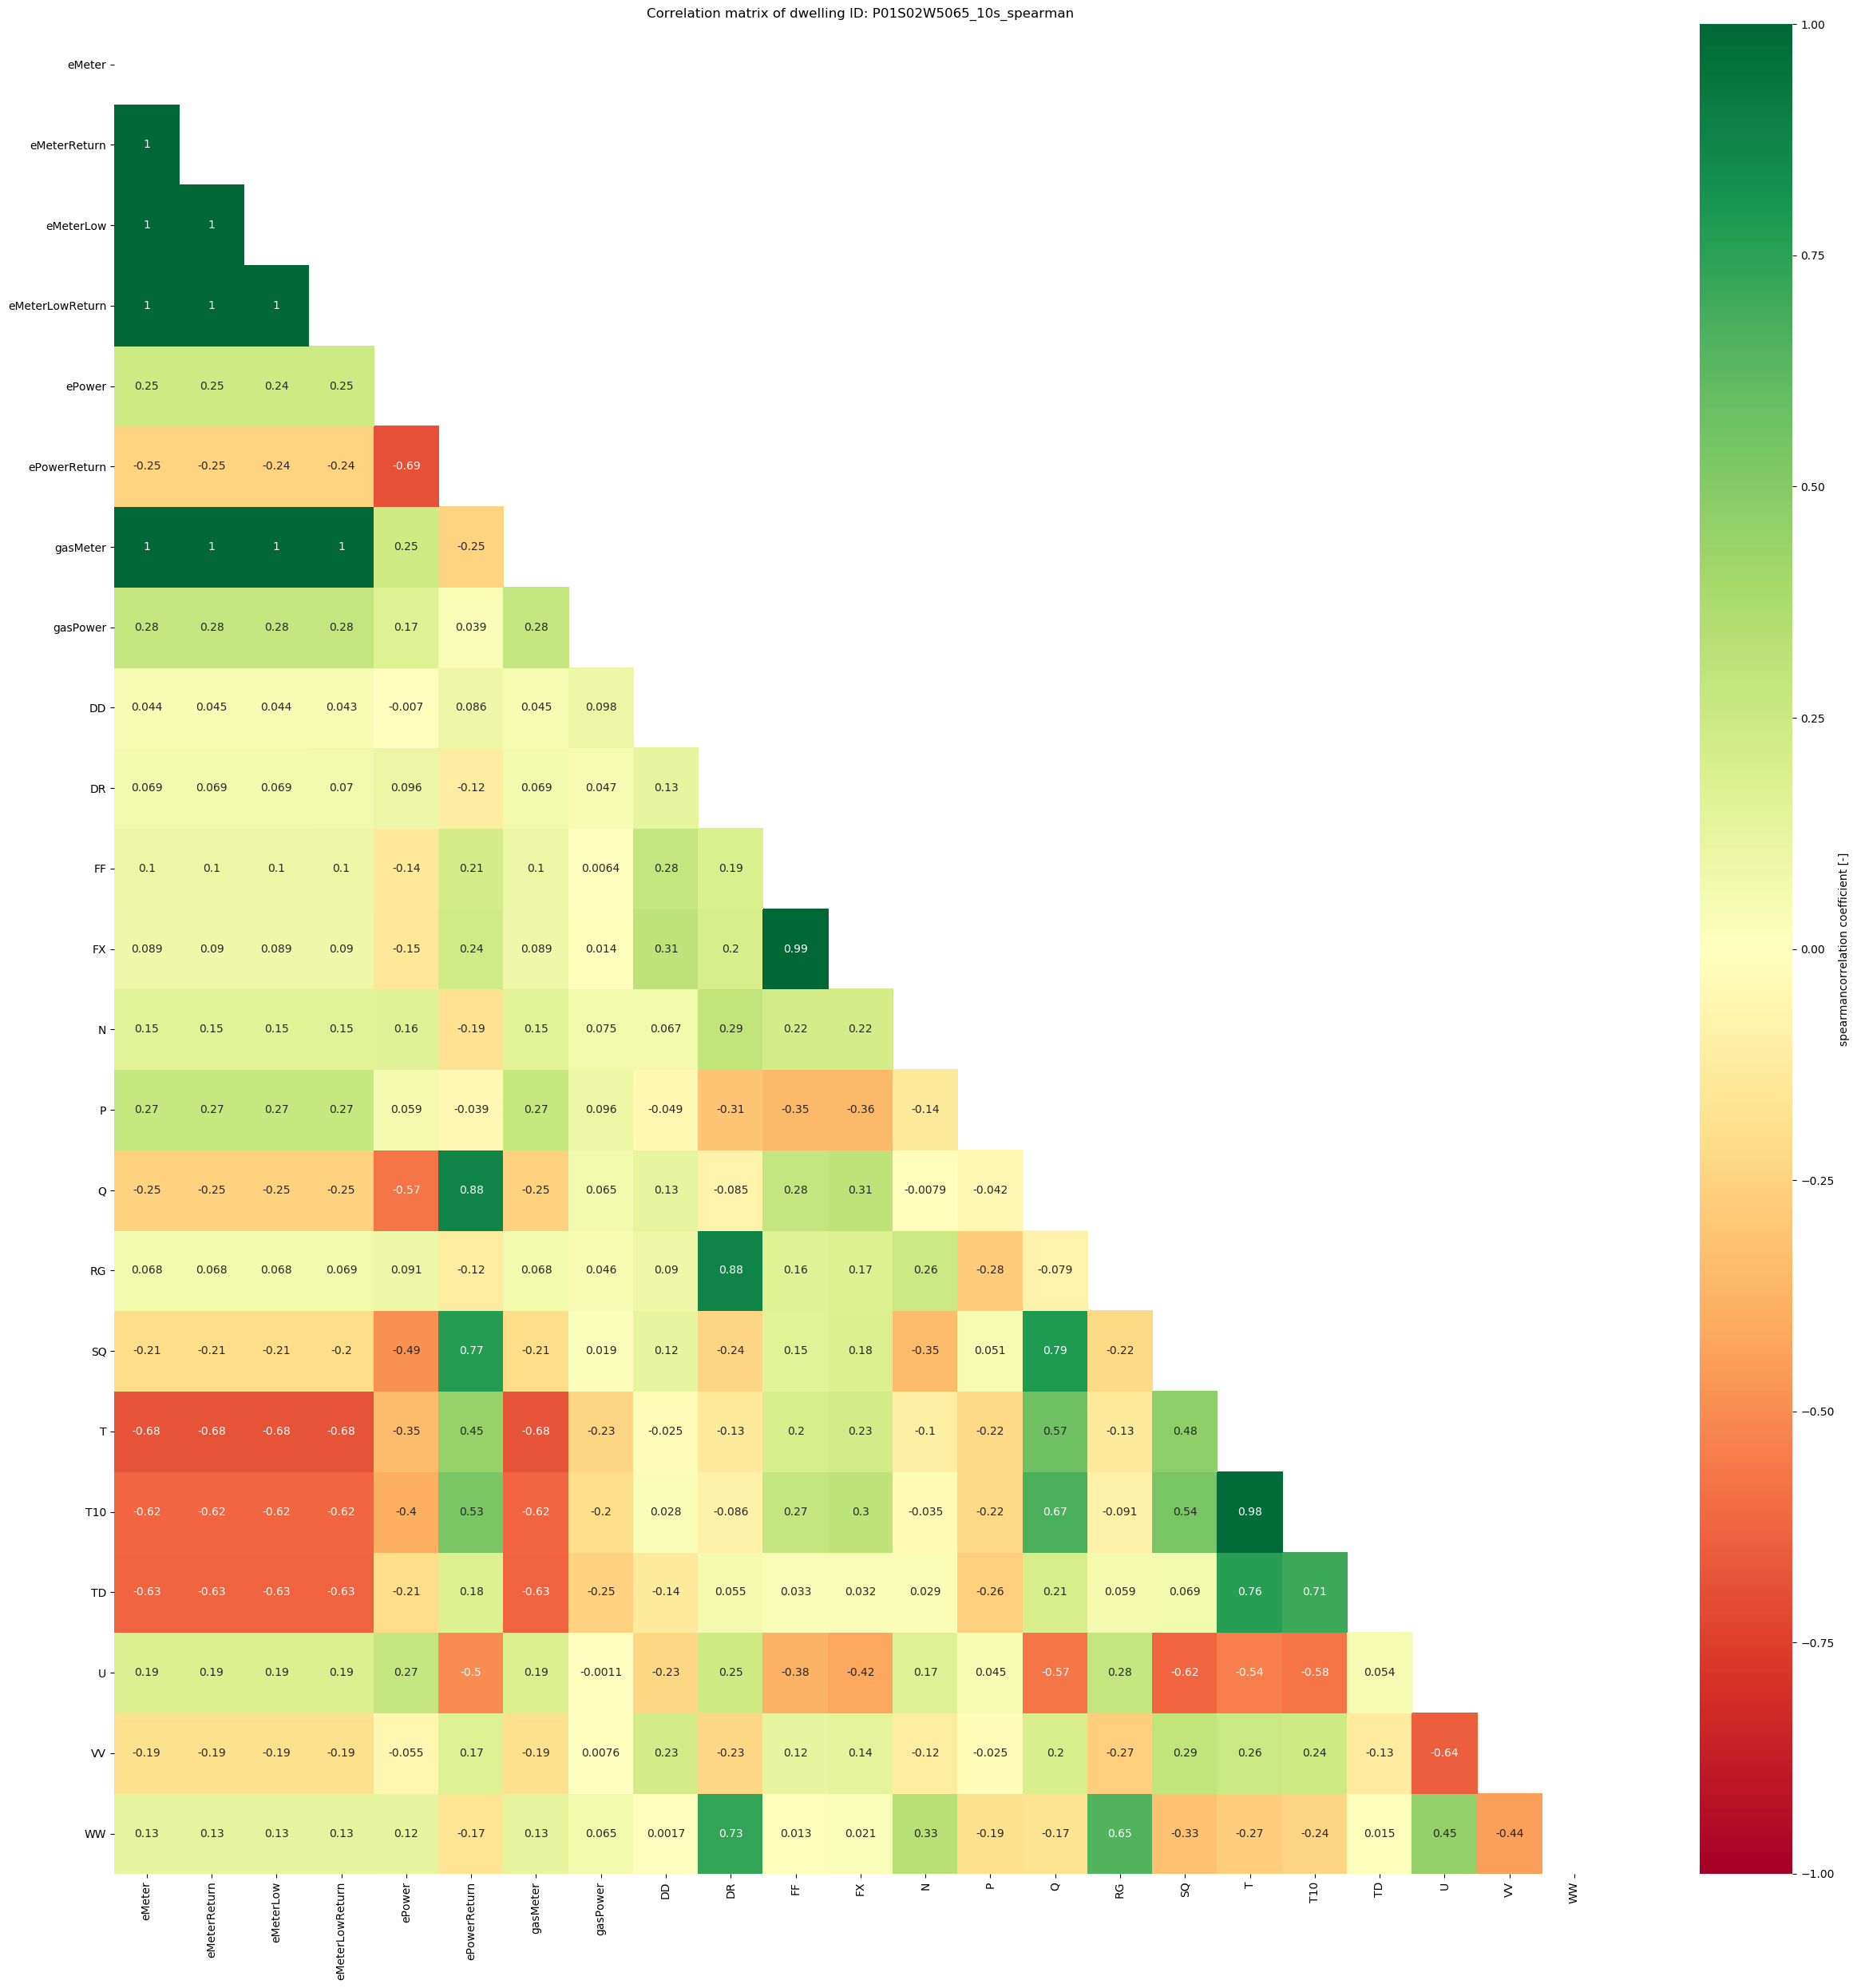

In [7]:
t1 = time.time()

file_paths, dwelling_ids = read_hour_data()
#dwelling_ids = dwelling_ids[34:35]

for i, dwelling in enumerate(dwelling_ids):
    print('---------- iteration %s out of %s ----------' % (i, len(dwelling_ids_hour)))
    dwelling_id = dwelling_ids[i]
    file_path = file_paths[i]
    
    print('Selected dwelling_ID: '+dwelling_id)
    s = pd.read_csv(file_path, delimiter='\t', parse_dates=['datetime'])
    s = s.set_index(['datetime'])
    
    # Do stuff from here on, for example apply the create_corr_matrix() function.
    create_corr_matrix(s, dwelling_id+'_10s_pearson', 'pearson', False)
    create_corr_matrix(s, dwelling_id+'_10s_pearson', 'pearson', True)
    
    create_corr_matrix(s, dwelling_id+'_10s_kendall', 'kendall', False)
    create_corr_matrix(s, dwelling_id+'_10s_kendall', 'kendall', True)
    
    create_corr_matrix(s, dwelling_id+'_10s_spearman', 'spearman', False)
    create_corr_matrix(s, dwelling_id+'_10s_spearman', 'spearman', True)

t2 = time.time()
print('---------- Finished in %.1f [s]' % (t2-t1))

# Merge all hour dfs, create corr matrices from the merged dfs

In [8]:
t1 = time.time()

file_paths, dwelling_ids = read_hour_data()

s_merged = None

for i, dwelling in enumerate(dwelling_ids):
    print('---------- iteration %s out of %s ----------' % (i, len(dwelling_ids_hour)))
    dwelling_id = dwelling_ids[i]
    file_path = file_paths[i]
    
    #print('Selected dwelling_ID: '+dwelling_id)
    s = pd.read_csv(file_path, delimiter='\t', parse_dates=['datetime'])
    #s = s.set_index(['datetime'])
    
    if i == 0:
        s_merged = s
    try:
        s_merged = s_merged.append(s, ignore_index=True)
    except:
        print('Failed to merge')
    
    print('Memory usage: %.1f [MB] '% (s_merged.memory_usage(index=True).sum() * 1*10**(-6)))

t2 = time.time()
s_merged.to_csv('//datc//opschaler//EDA//all_hour_dfs_appended.csv', sep='\t', index=True)
print('---------- Finished in %.1f [s]' % (t2-t1))

s_merged.info()

Detected 38 files.
---------- iteration 0 out of 38 ----------
Memory usage: 0.8 [MB] 
---------- iteration 1 out of 38 ----------
Memory usage: 1.4 [MB] 
---------- iteration 2 out of 38 ----------
Memory usage: 1.8 [MB] 
---------- iteration 3 out of 38 ----------
Memory usage: 2.2 [MB] 
---------- iteration 4 out of 38 ----------
Memory usage: 2.6 [MB] 
---------- iteration 5 out of 38 ----------
Memory usage: 3.0 [MB] 
---------- iteration 6 out of 38 ----------
Memory usage: 3.1 [MB] 
---------- iteration 7 out of 38 ----------
Memory usage: 3.5 [MB] 
---------- iteration 8 out of 38 ----------
Memory usage: 4.2 [MB] 
---------- iteration 9 out of 38 ----------
Memory usage: 4.6 [MB] 
---------- iteration 10 out of 38 ----------
Memory usage: 5.6 [MB] 
---------- iteration 11 out of 38 ----------
Memory usage: 6.0 [MB] 
---------- iteration 12 out of 38 ----------
Memory usage: 6.3 [MB] 
---------- iteration 13 out of 38 ----------
Memory usage: 6.7 [MB] 
---------- iteration 14 o

In [9]:
s_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88387 entries, 0 to 88386
Data columns (total 24 columns):
datetime           88387 non-null datetime64[ns]
eMeter             88387 non-null float64
eMeterReturn       88387 non-null float64
eMeterLow          88387 non-null float64
eMeterLowReturn    88387 non-null float64
ePower             82716 non-null float64
ePowerReturn       82716 non-null float64
gasMeter           88243 non-null float64
gasPower           82103 non-null float64
DD                 88387 non-null float64
DR                 88387 non-null float64
FF                 88387 non-null float64
FX                 88387 non-null float64
N                  88387 non-null float64
P                  88387 non-null float64
Q                  88387 non-null float64
RG                 88387 non-null float64
SQ                 88387 non-null float64
T                  88387 non-null float64
T10                88387 non-null float64
TD                 88387 non-null float64
U 

Corr contains 0 NaNs 


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Corr contains 0 NaNs 


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

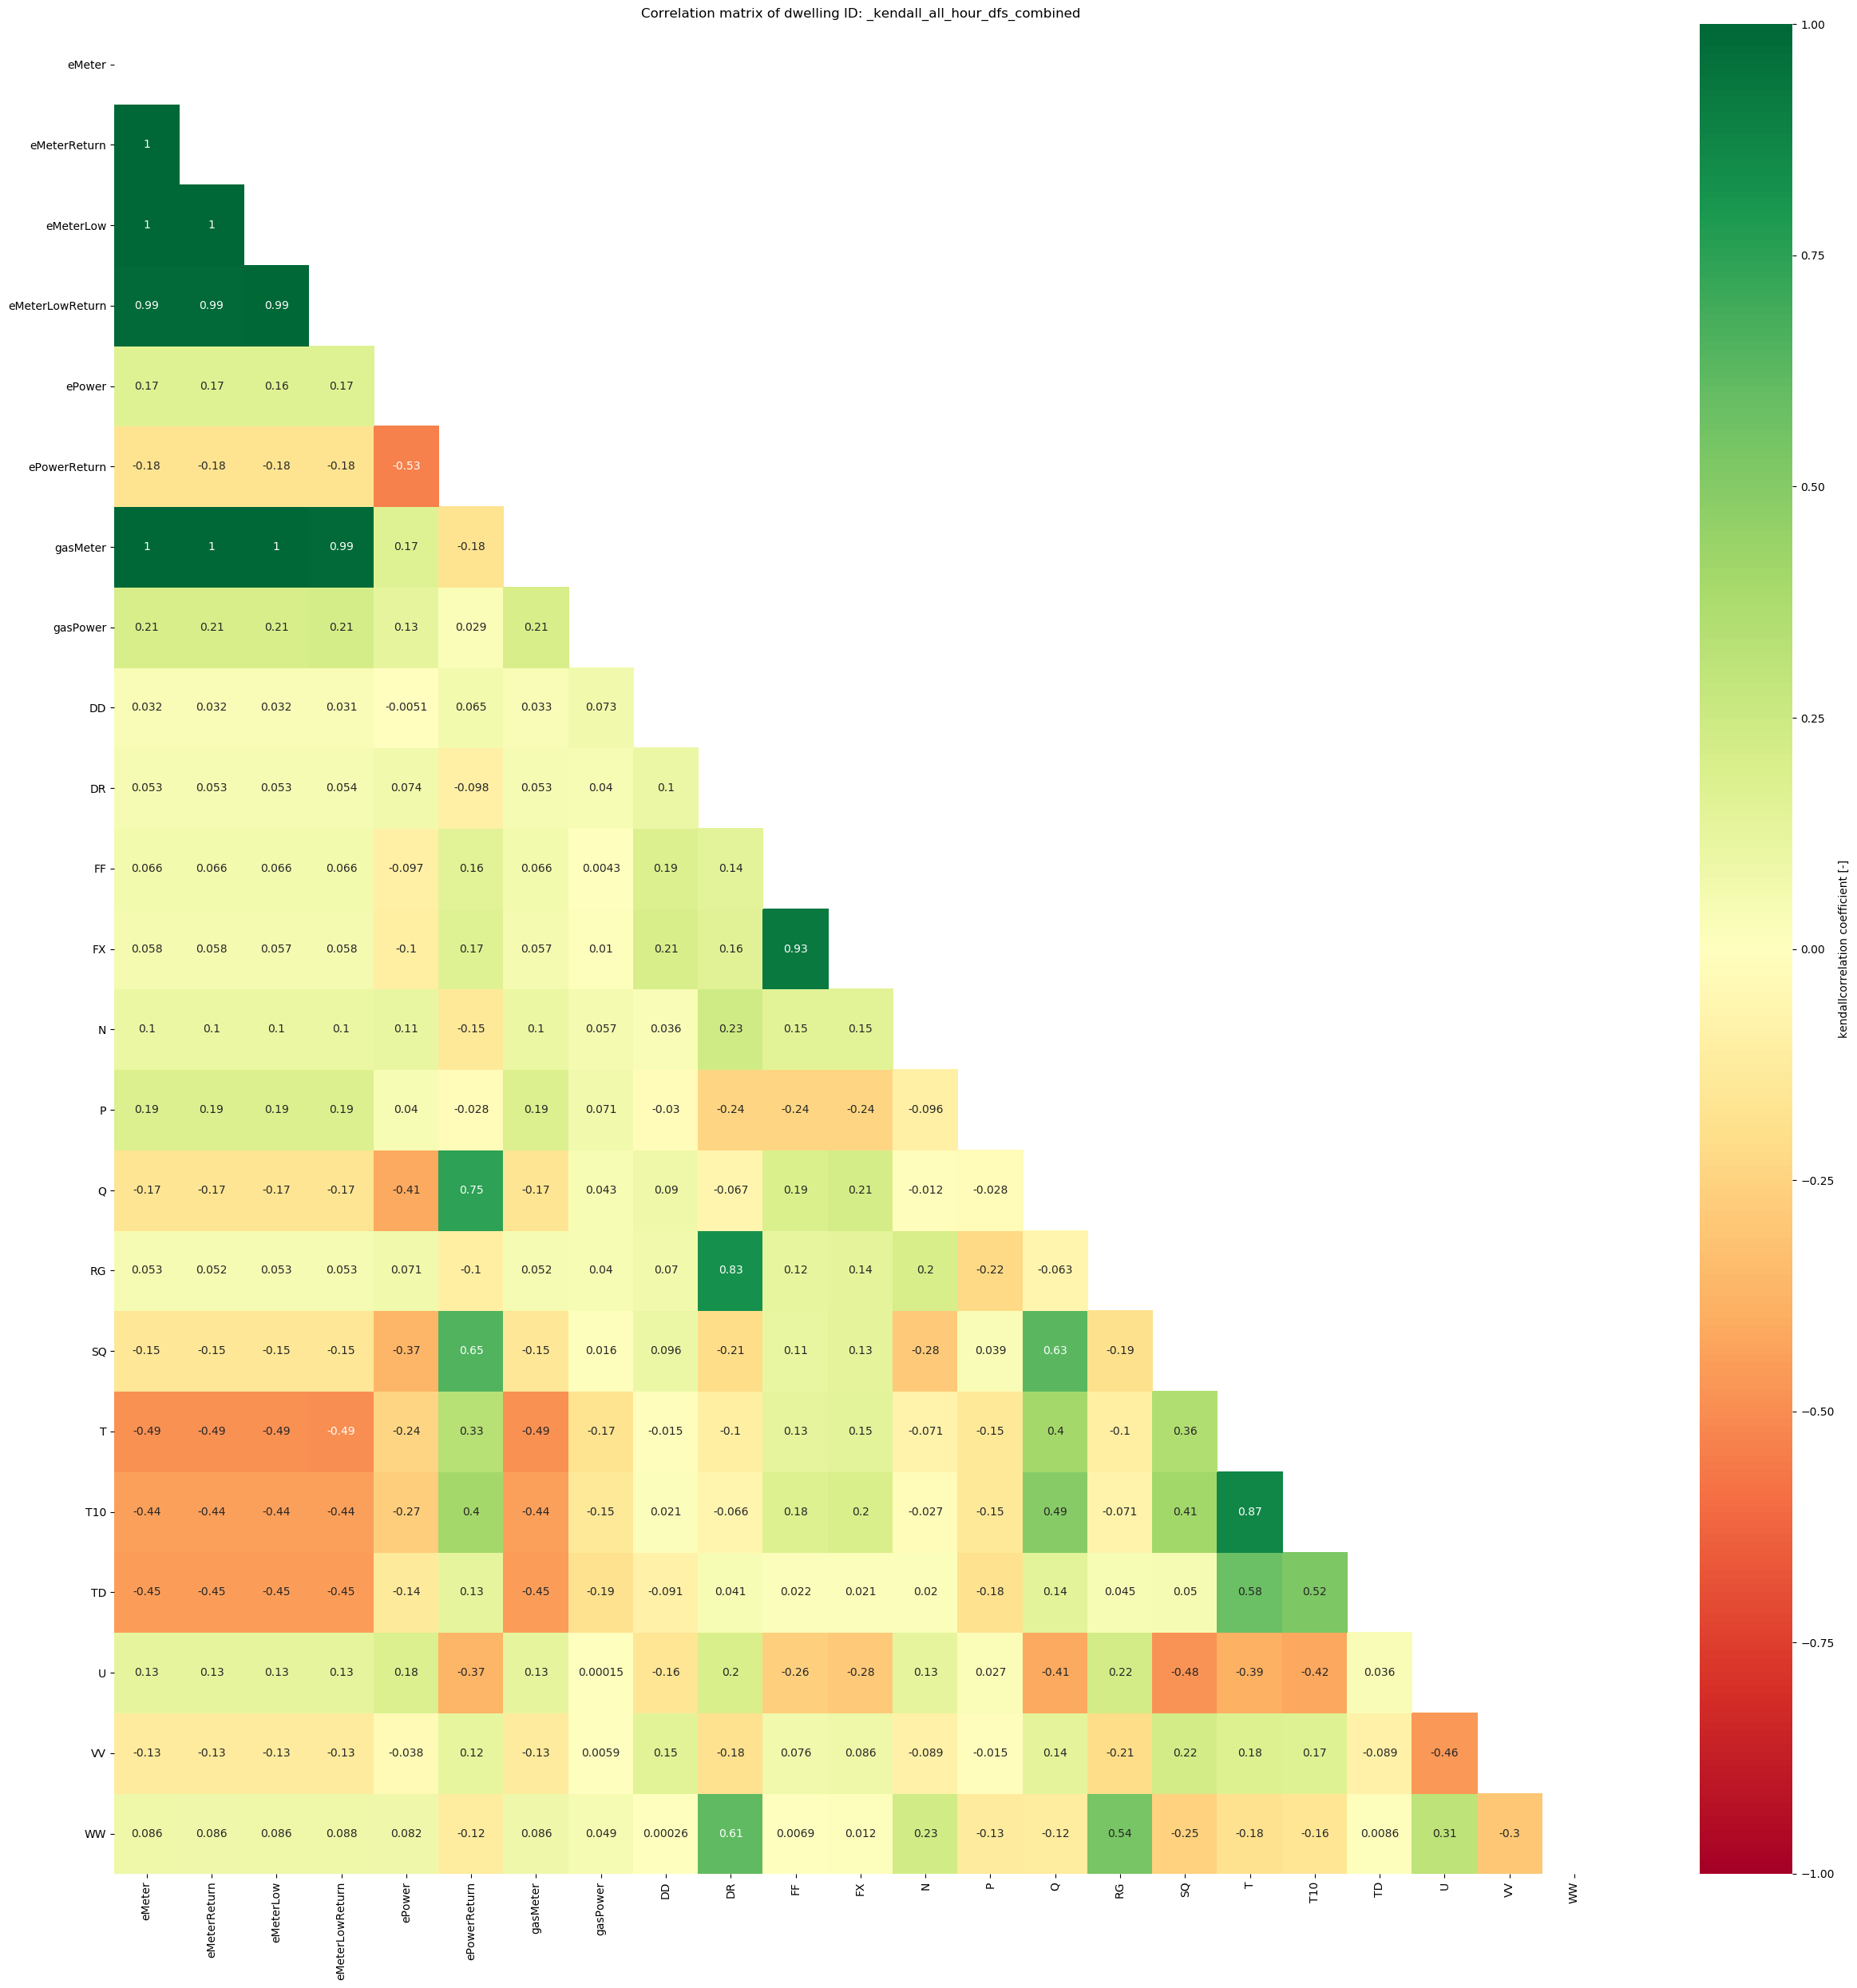

In [10]:
dwelling_id = ''
create_corr_matrix(s_merged, dwelling_id+'_kendall_all_hour_dfs_combined', 'kendall', False)
create_corr_matrix(s_merged, dwelling_id+'_kendall_all_hour_dfs_combined', 'kendall', True)

Corr contains 0 NaNs 


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Corr contains 0 NaNs 


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

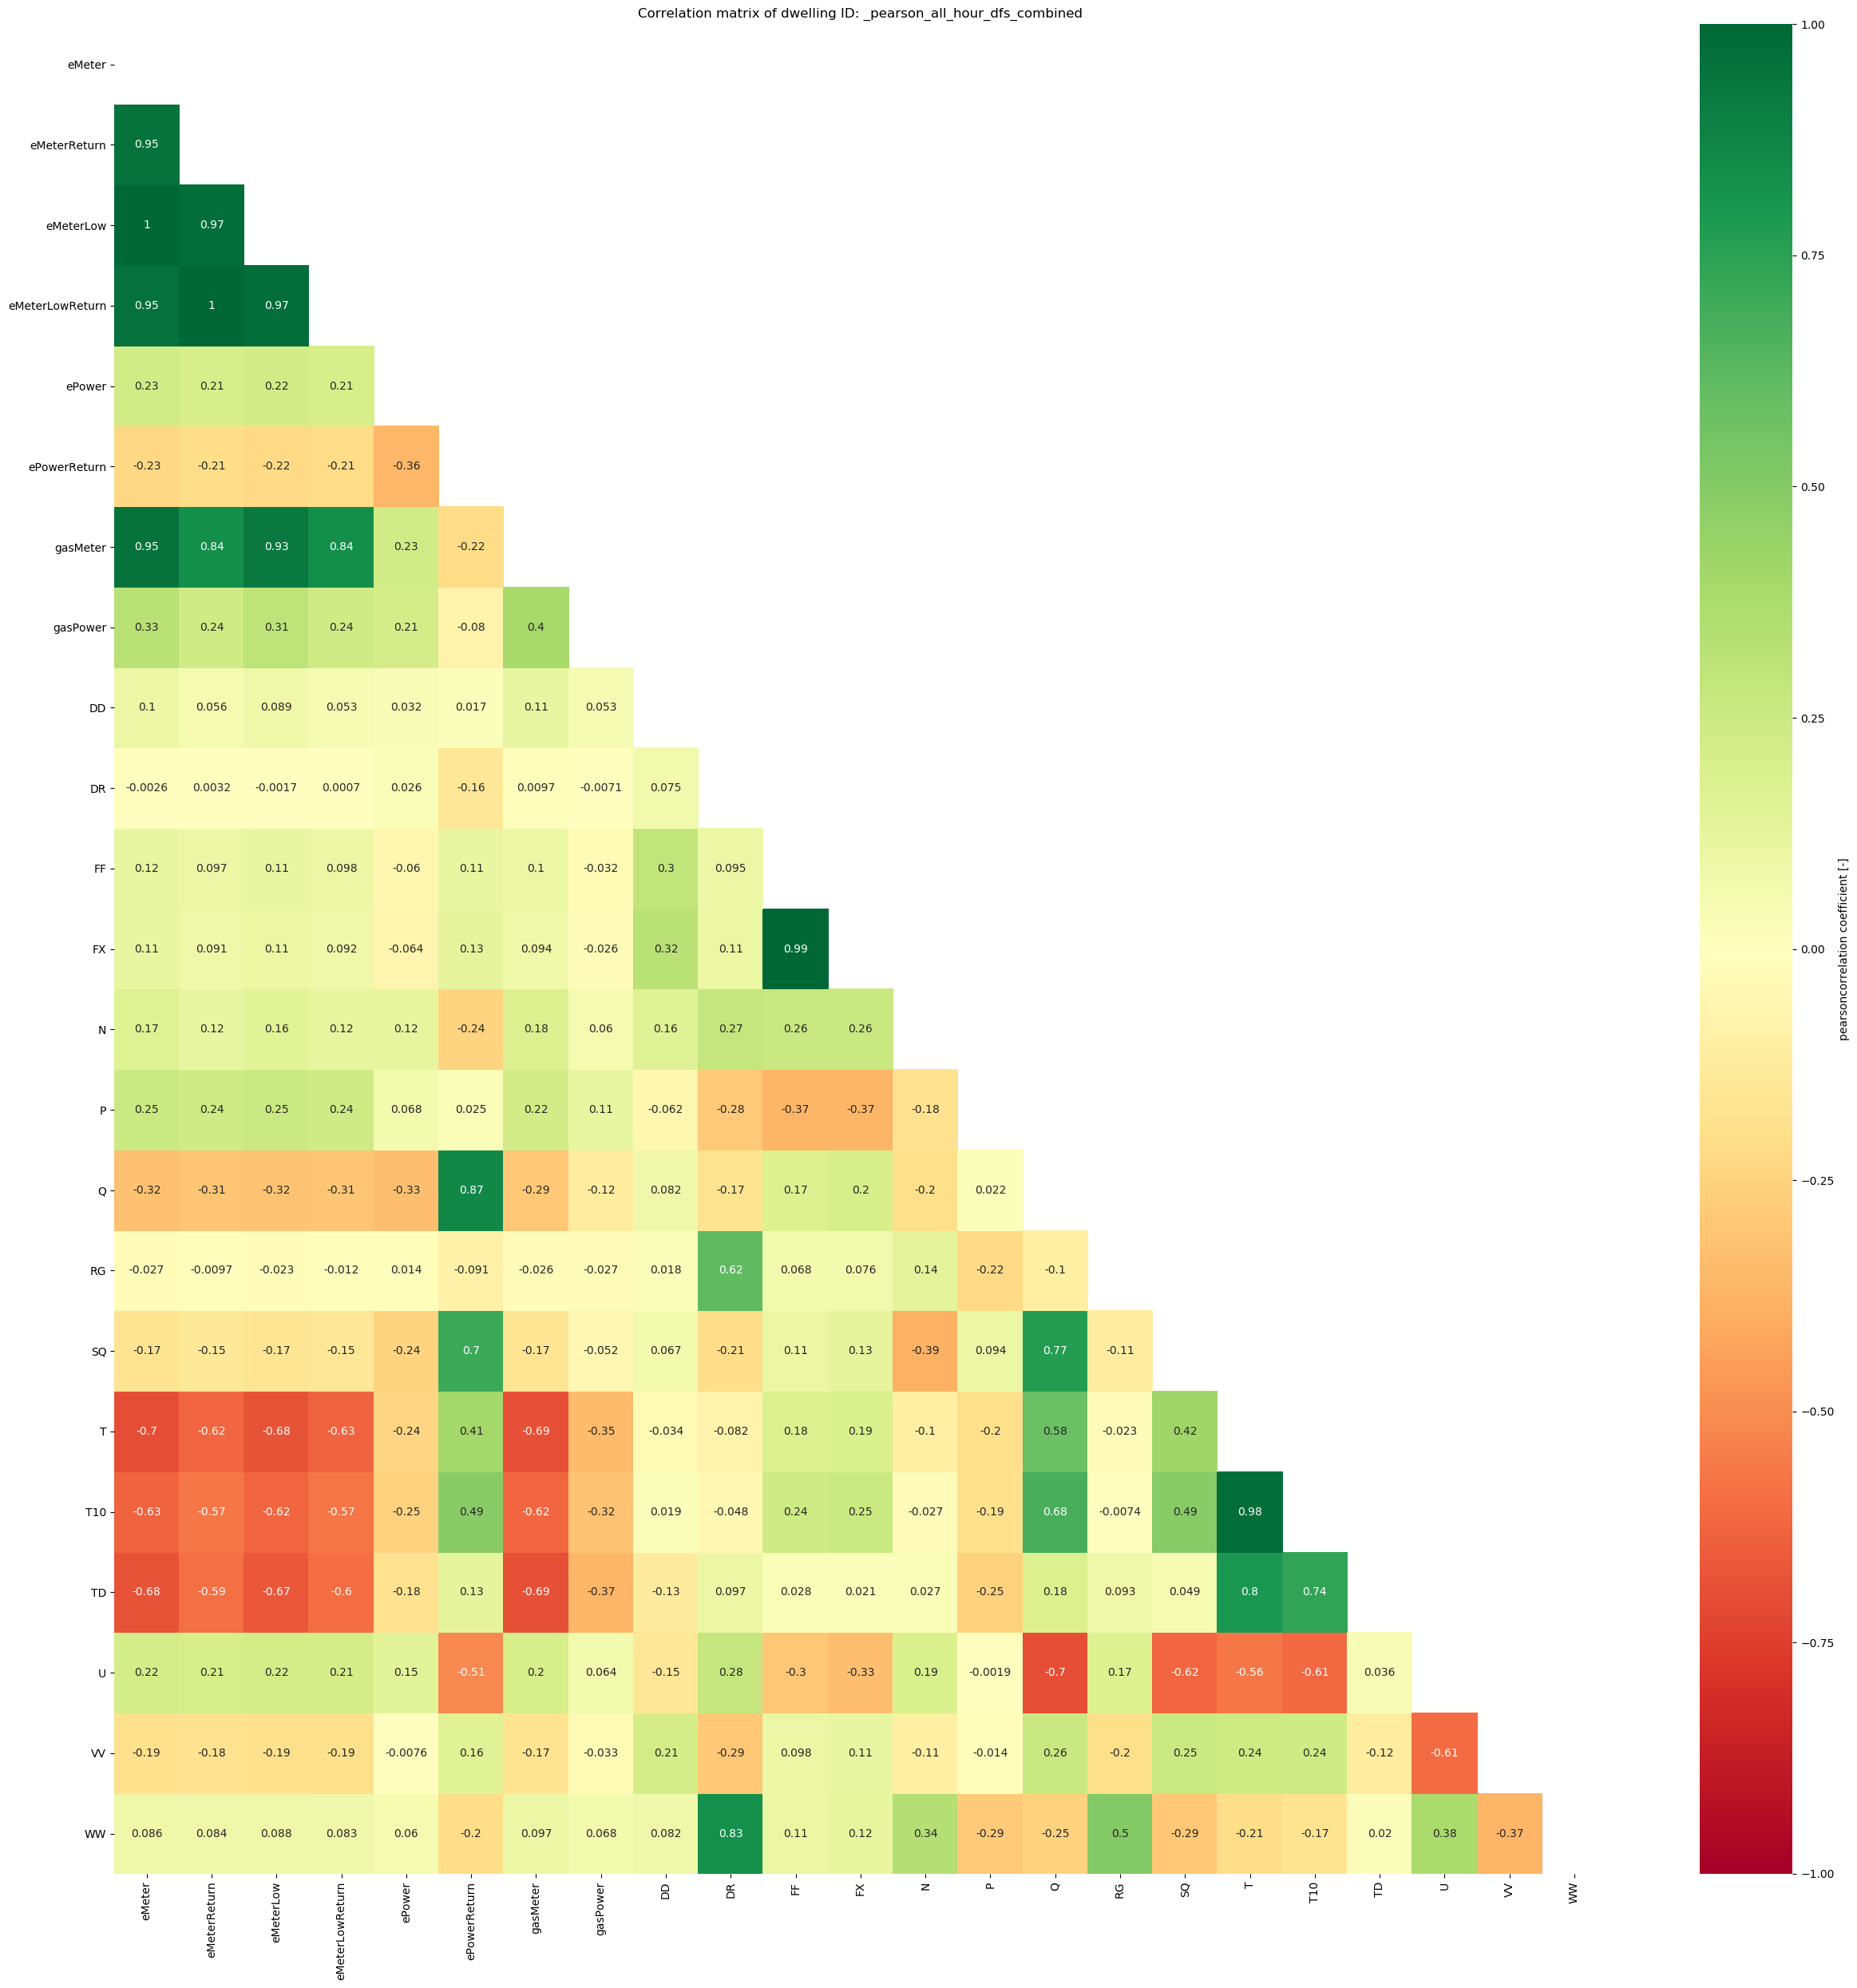

In [11]:
dwelling_id = ''
create_corr_matrix(s_merged, dwelling_id+'_pearson_all_hour_dfs_combined', 'pearson', False)
create_corr_matrix(s_merged, dwelling_id+'_pearson_all_hour_dfs_combined', 'pearson', True)

Corr contains 0 NaNs 


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Corr contains 0 NaNs 


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

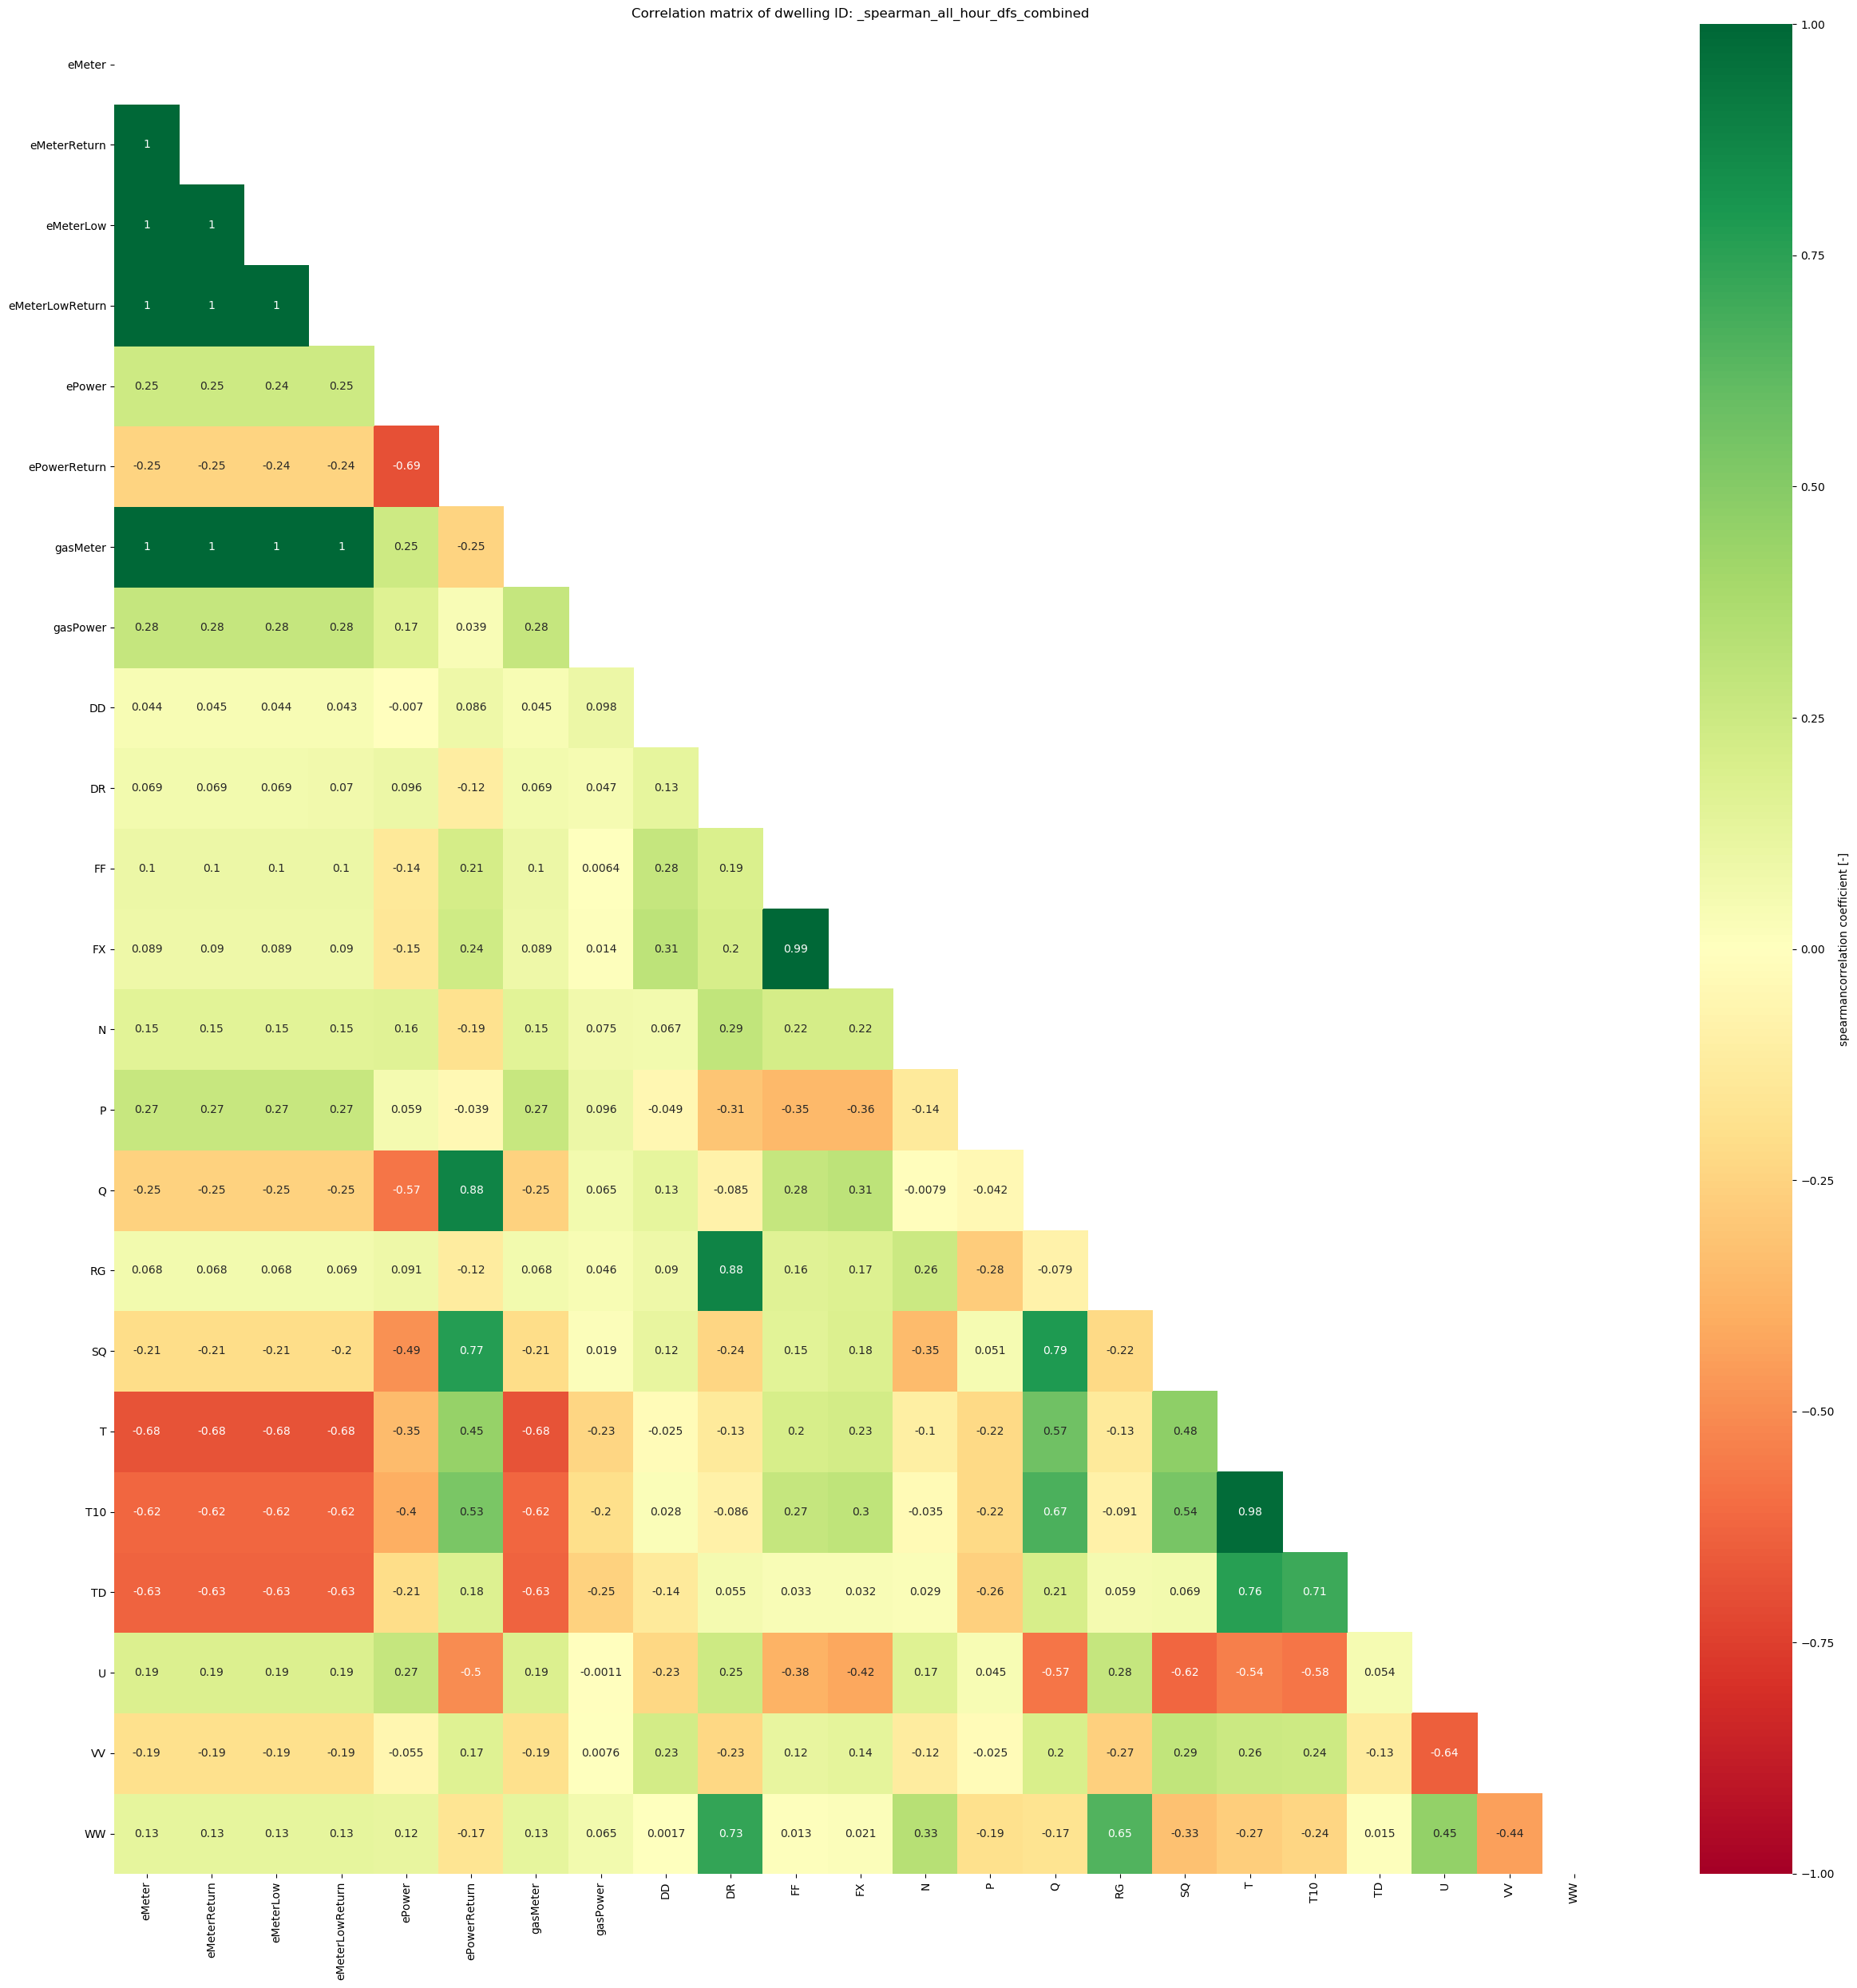

In [12]:
dwelling_id = ''
create_corr_matrix(s_merged, dwelling_id+'_spearman_all_hour_dfs_combined', 'spearman', False)
create_corr_matrix(s_merged, dwelling_id+'_spearman_all_hour_dfs_combined', 'spearman', True)

# Merge all 10s dfs, create corr matrices from the merged dfs

In [17]:
t1 = time.time()

file_paths, dwelling_ids = read_10s_data()

s_merged = None

for i, dwelling in enumerate(dwelling_ids):
    print('---------- iteration %s out of %s ----------' % (i, len(dwelling_ids_hour)))
    dwelling_id = dwelling_ids[i]
    file_path = file_paths[i]
    
    #print('Selected dwelling_ID: '+dwelling_id)
    s = pd.read_csv(file_path, delimiter='\t', parse_dates=['datetime'])
    #s = s.set_index(['datetime'])
    
    if i == 0:
        s_merged = s
    try:
        s_merged = s_merged.append(s, ignore_index=True)
    except:
        print('Failed to merge')
    
    print('Memory usage: %.1f [GB] '% (s_merged.memory_usage(index=True).sum() * 1*10**(-9)))

s_merged.to_csv('//datc//opschaler//EDA//all_10s_dfs_appended.csv', sep='\t', index=True)
t2 = time.time()
print('---------- Finished in %.1f [s]' % (t2-t1))

s_merged.info()

Detected 38 files.
---------- iteration 0 out of 38 ----------
Memory usage: 0.3 [GB] 
---------- iteration 1 out of 38 ----------
Memory usage: 0.4 [GB] 
---------- iteration 2 out of 38 ----------
Memory usage: 0.6 [GB] 
---------- iteration 3 out of 38 ----------
Memory usage: 0.8 [GB] 
---------- iteration 4 out of 38 ----------
Memory usage: 1.1 [GB] 
---------- iteration 5 out of 38 ----------
Memory usage: 1.2 [GB] 
---------- iteration 6 out of 38 ----------
Memory usage: 1.3 [GB] 
---------- iteration 7 out of 38 ----------
Memory usage: 1.3 [GB] 
---------- iteration 8 out of 38 ----------
Memory usage: 1.5 [GB] 
---------- iteration 9 out of 38 ----------
Memory usage: 1.6 [GB] 
---------- iteration 10 out of 38 ----------
Memory usage: 1.9 [GB] 
---------- iteration 11 out of 38 ----------
Memory usage: 2.0 [GB] 
---------- iteration 12 out of 38 ----------
Memory usage: 2.1 [GB] 
---------- iteration 13 out of 38 ----------
Memory usage: 2.5 [GB] 
---------- iteration 14 o

Corr contains 126 NaNs 


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Corr contains 126 NaNs 


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

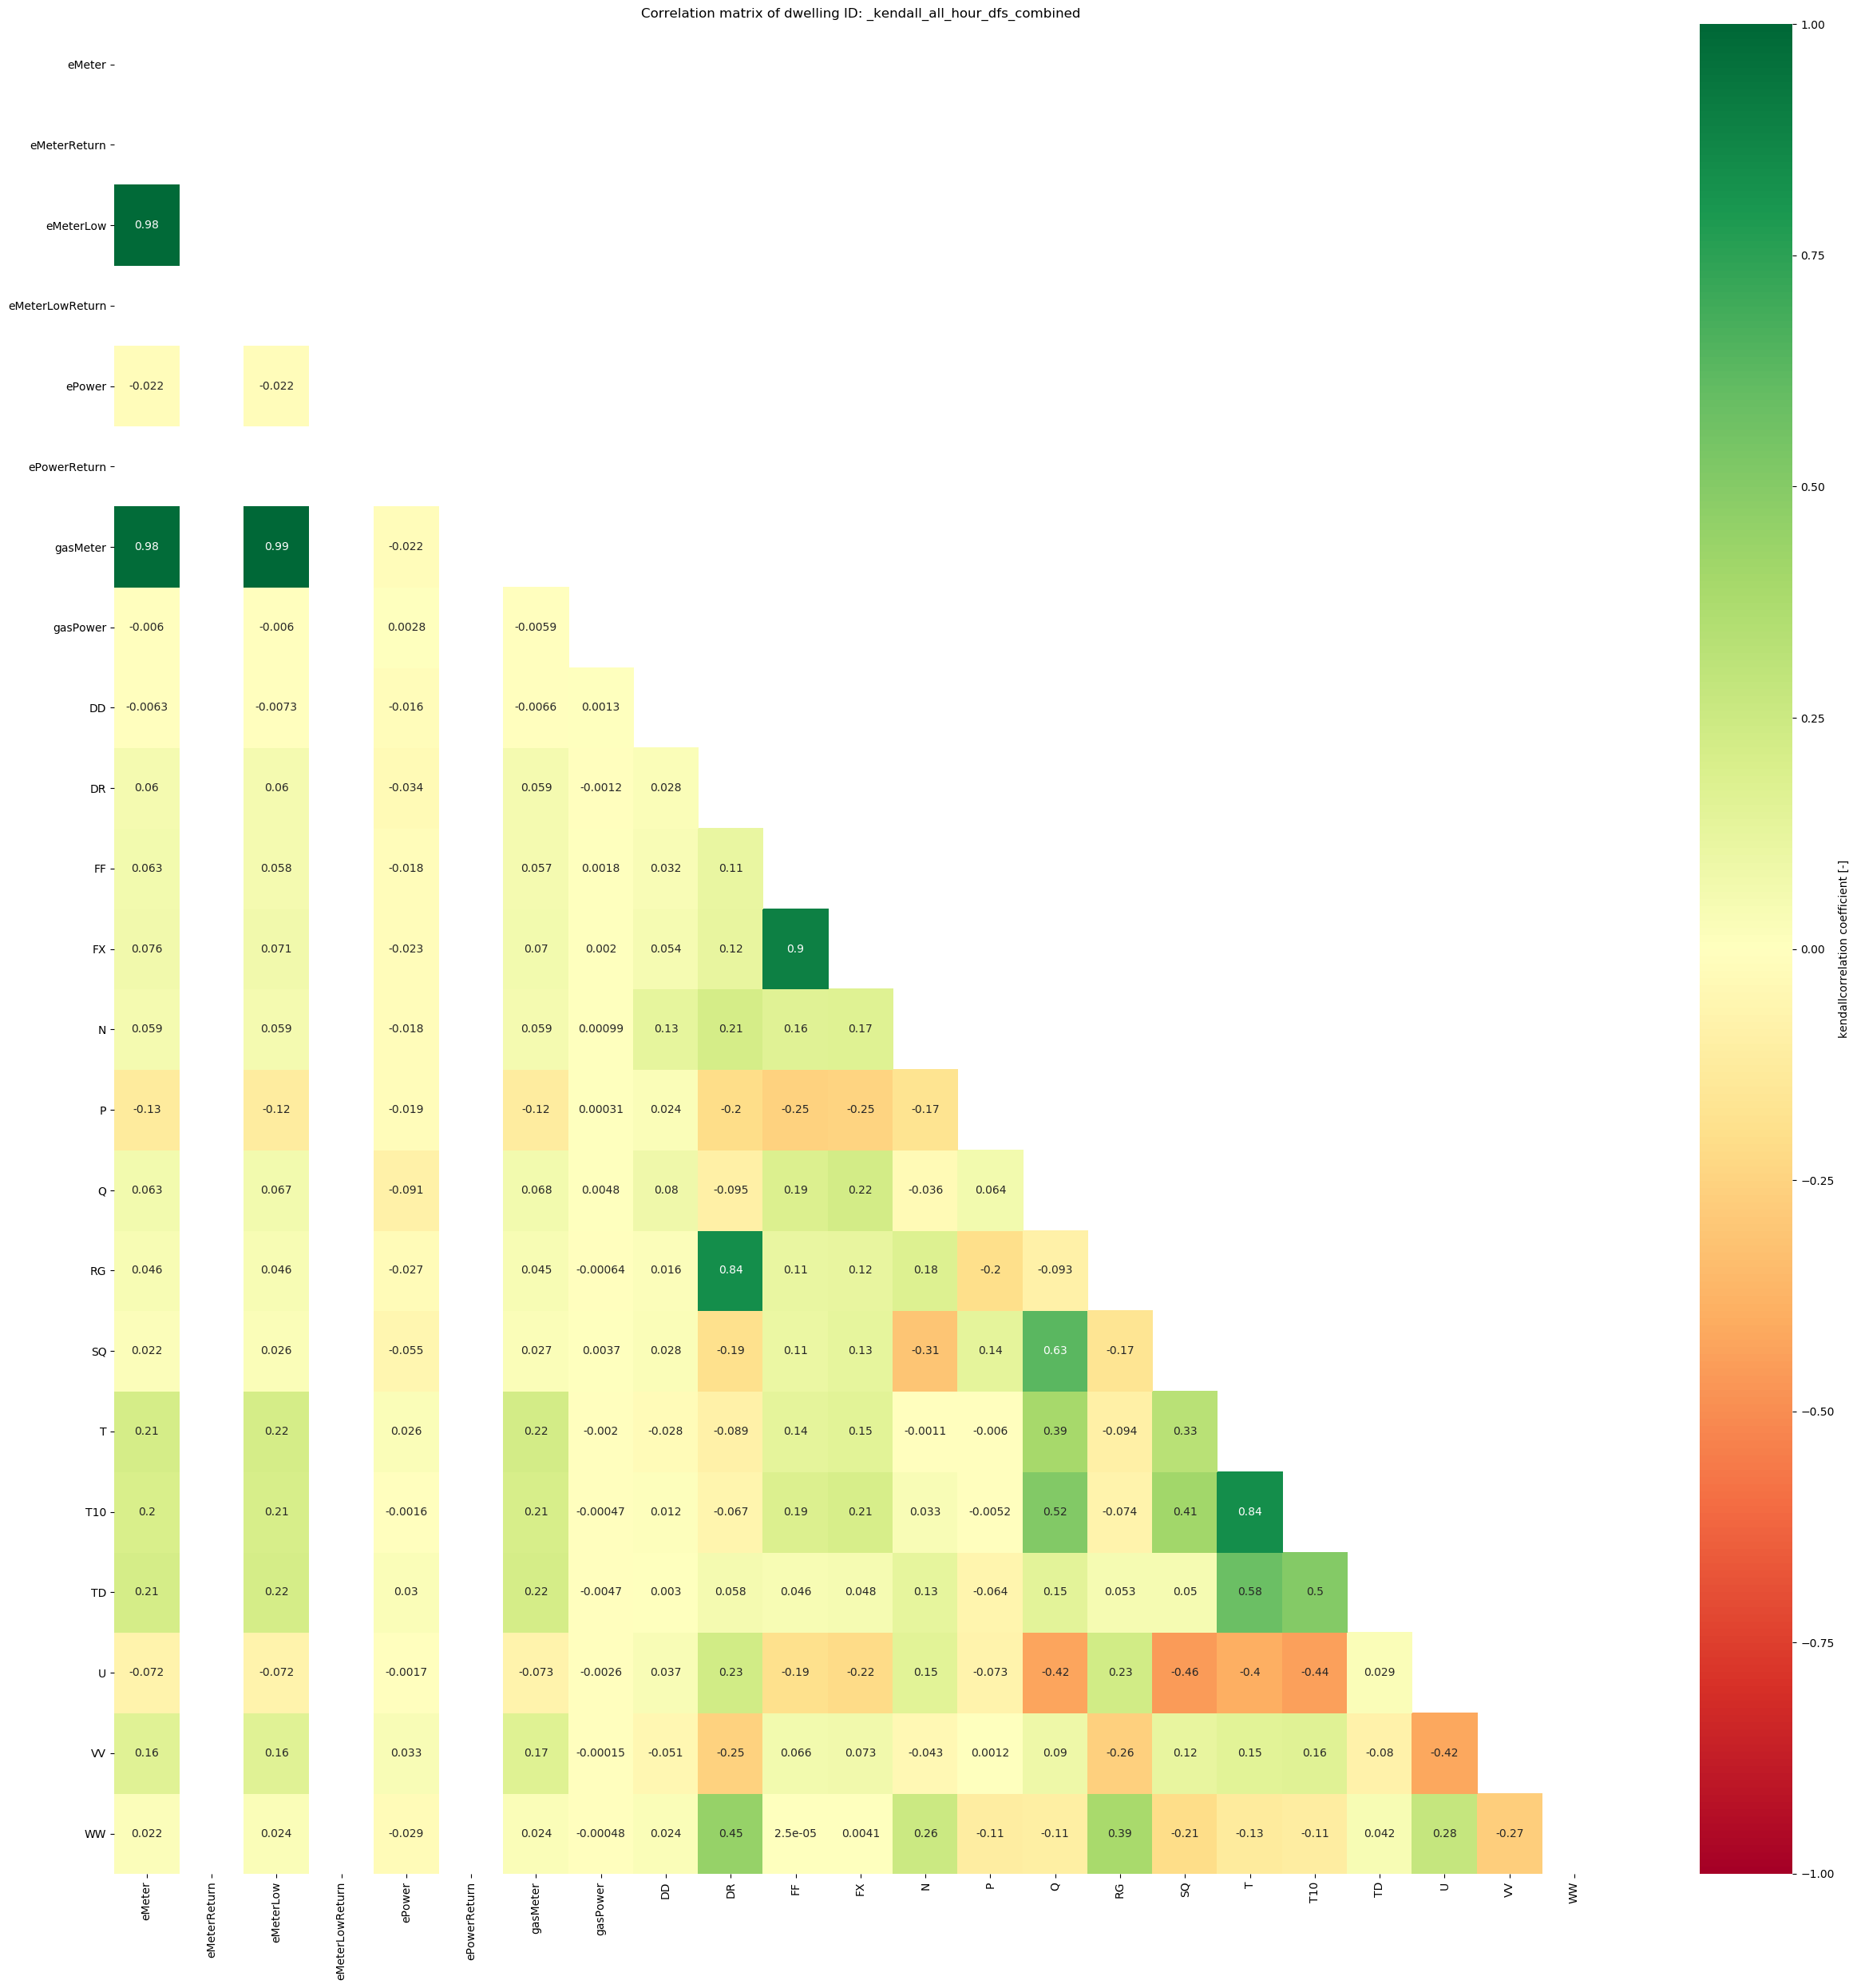

In [18]:
dwelling_id = ''
create_corr_matrix(s_merged, dwelling_id+'_kendall_all_hour_dfs_combined', 'kendall', False)
create_corr_matrix(s_merged, dwelling_id+'_kendall_all_hour_dfs_combined', 'kendall', True)

Corr contains 129 NaNs 


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Corr contains 129 NaNs 


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

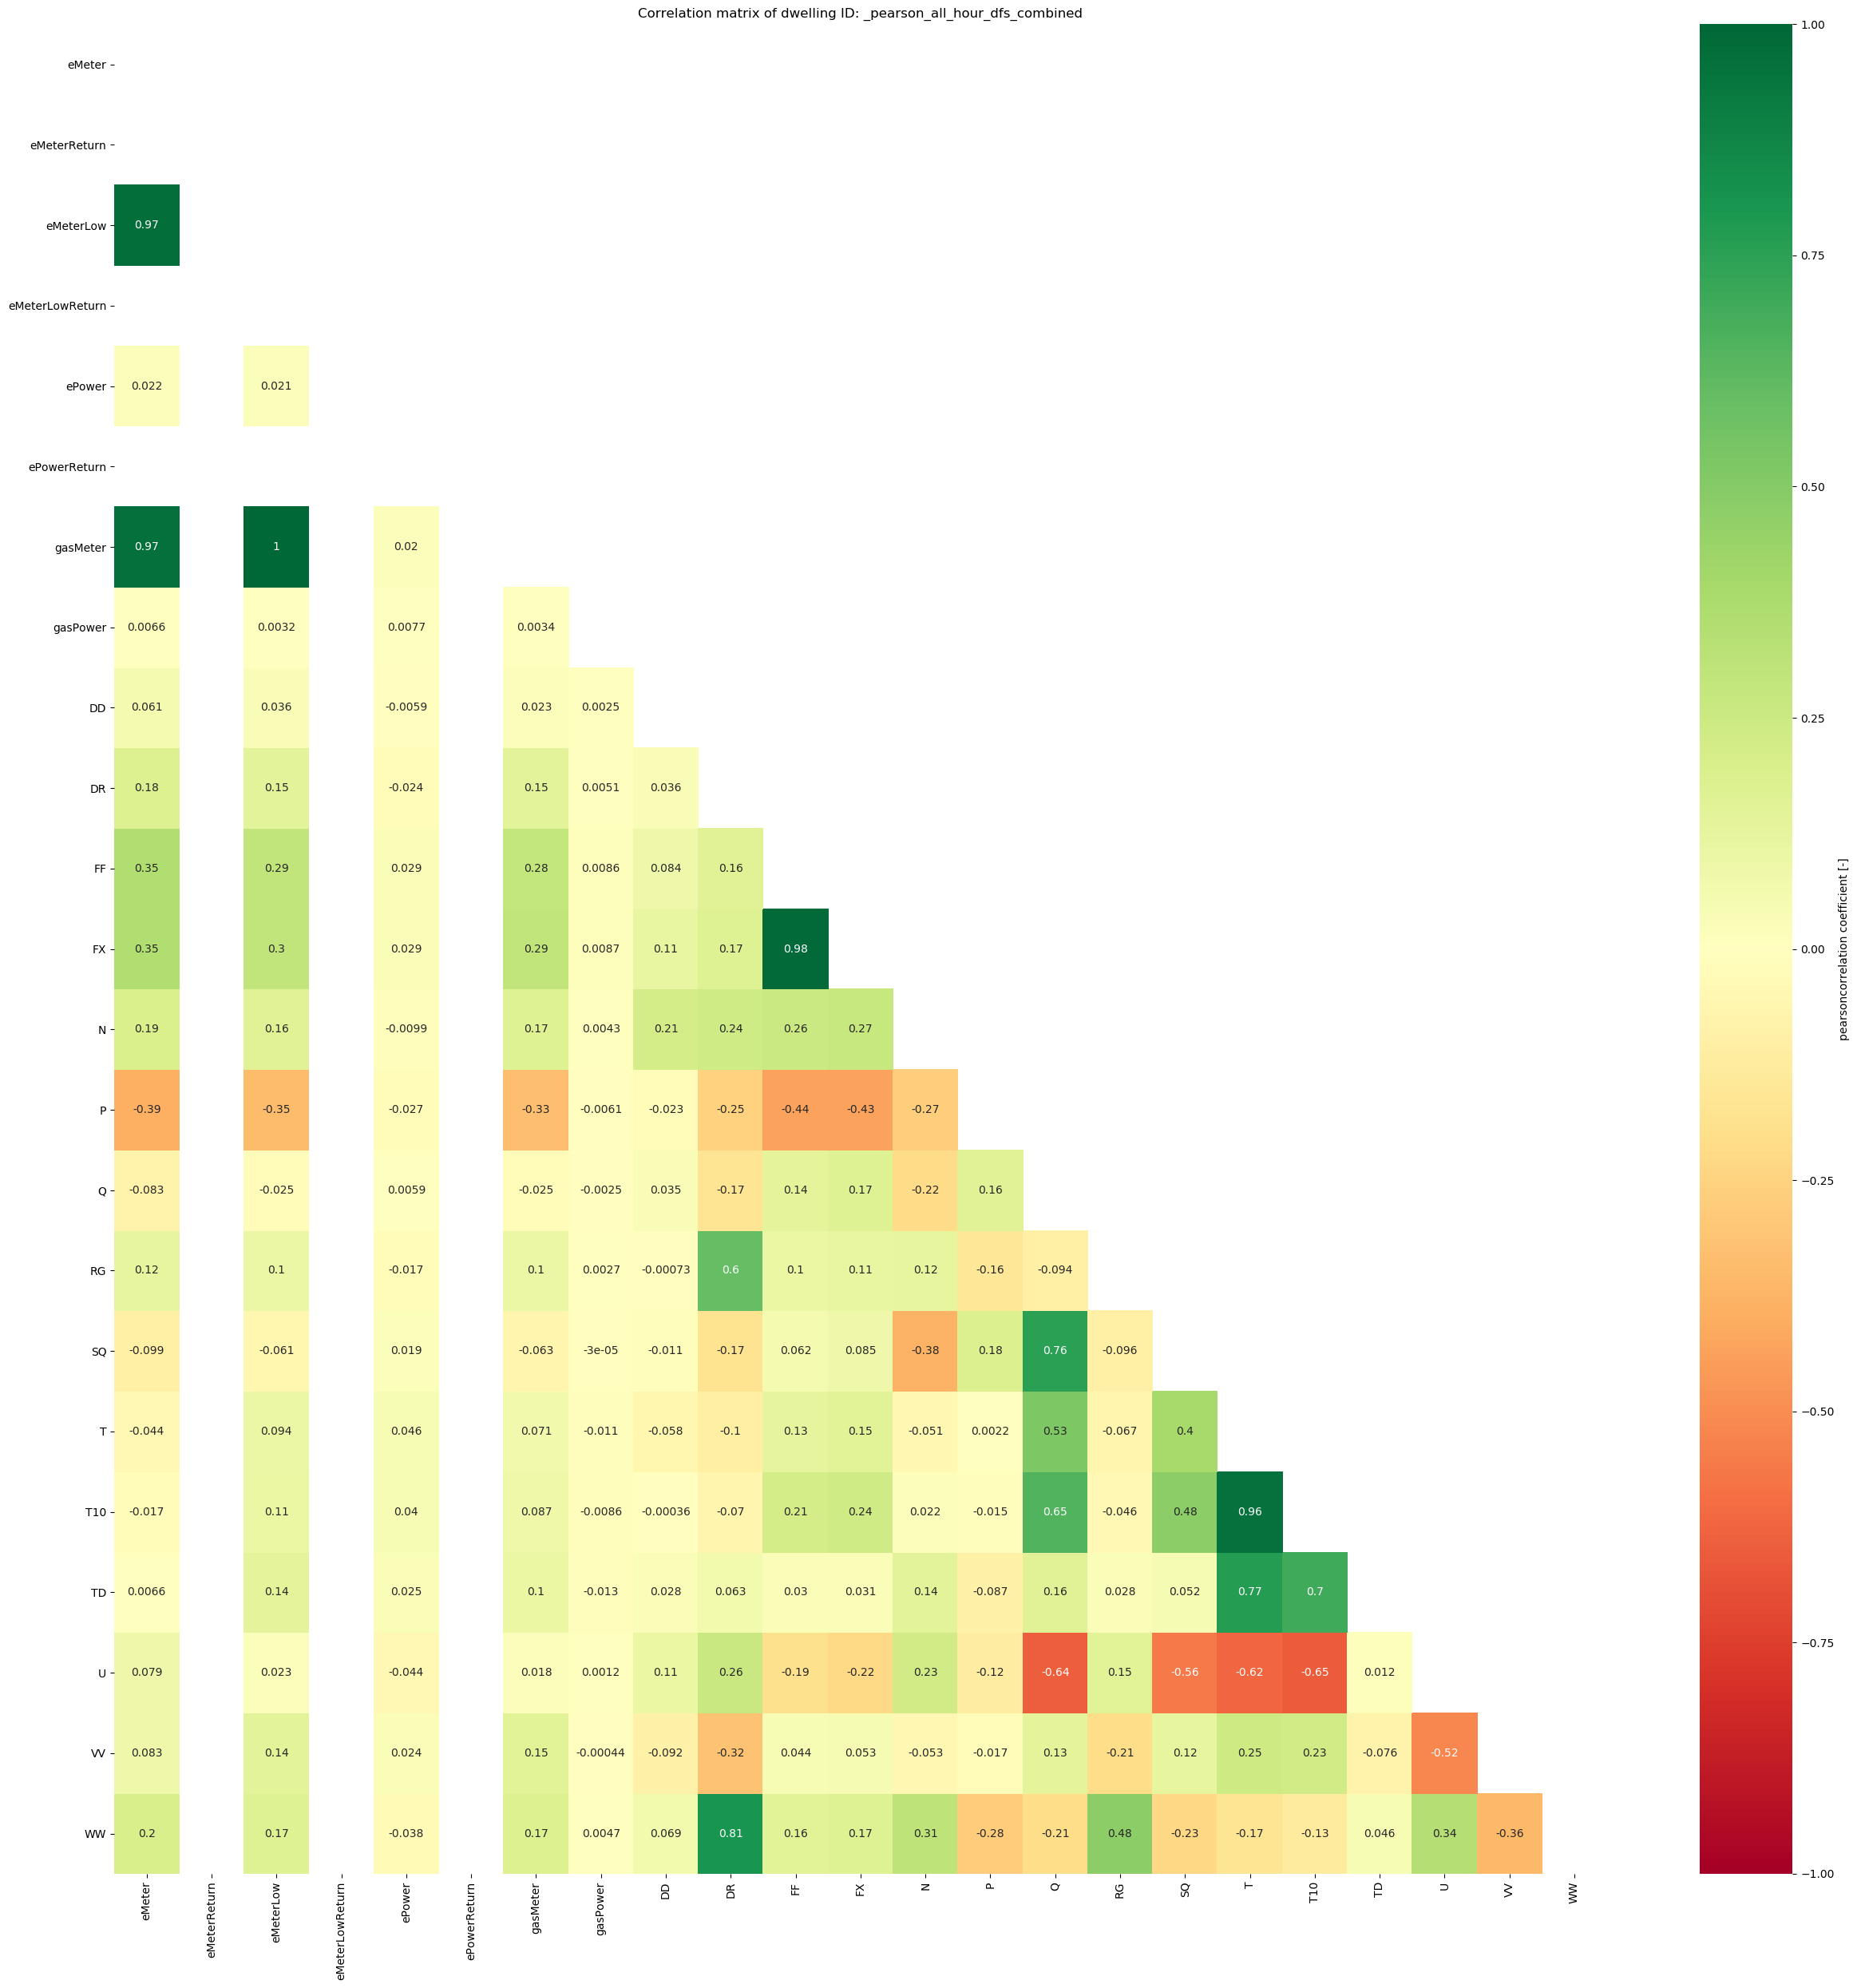

In [19]:
dwelling_id = ''
create_corr_matrix(s_merged, dwelling_id+'_pearson_all_hour_dfs_combined', 'pearson', False)
create_corr_matrix(s_merged, dwelling_id+'_pearson_all_hour_dfs_combined', 'pearson', True)

Corr contains 129 NaNs 


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Corr contains 129 NaNs 


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

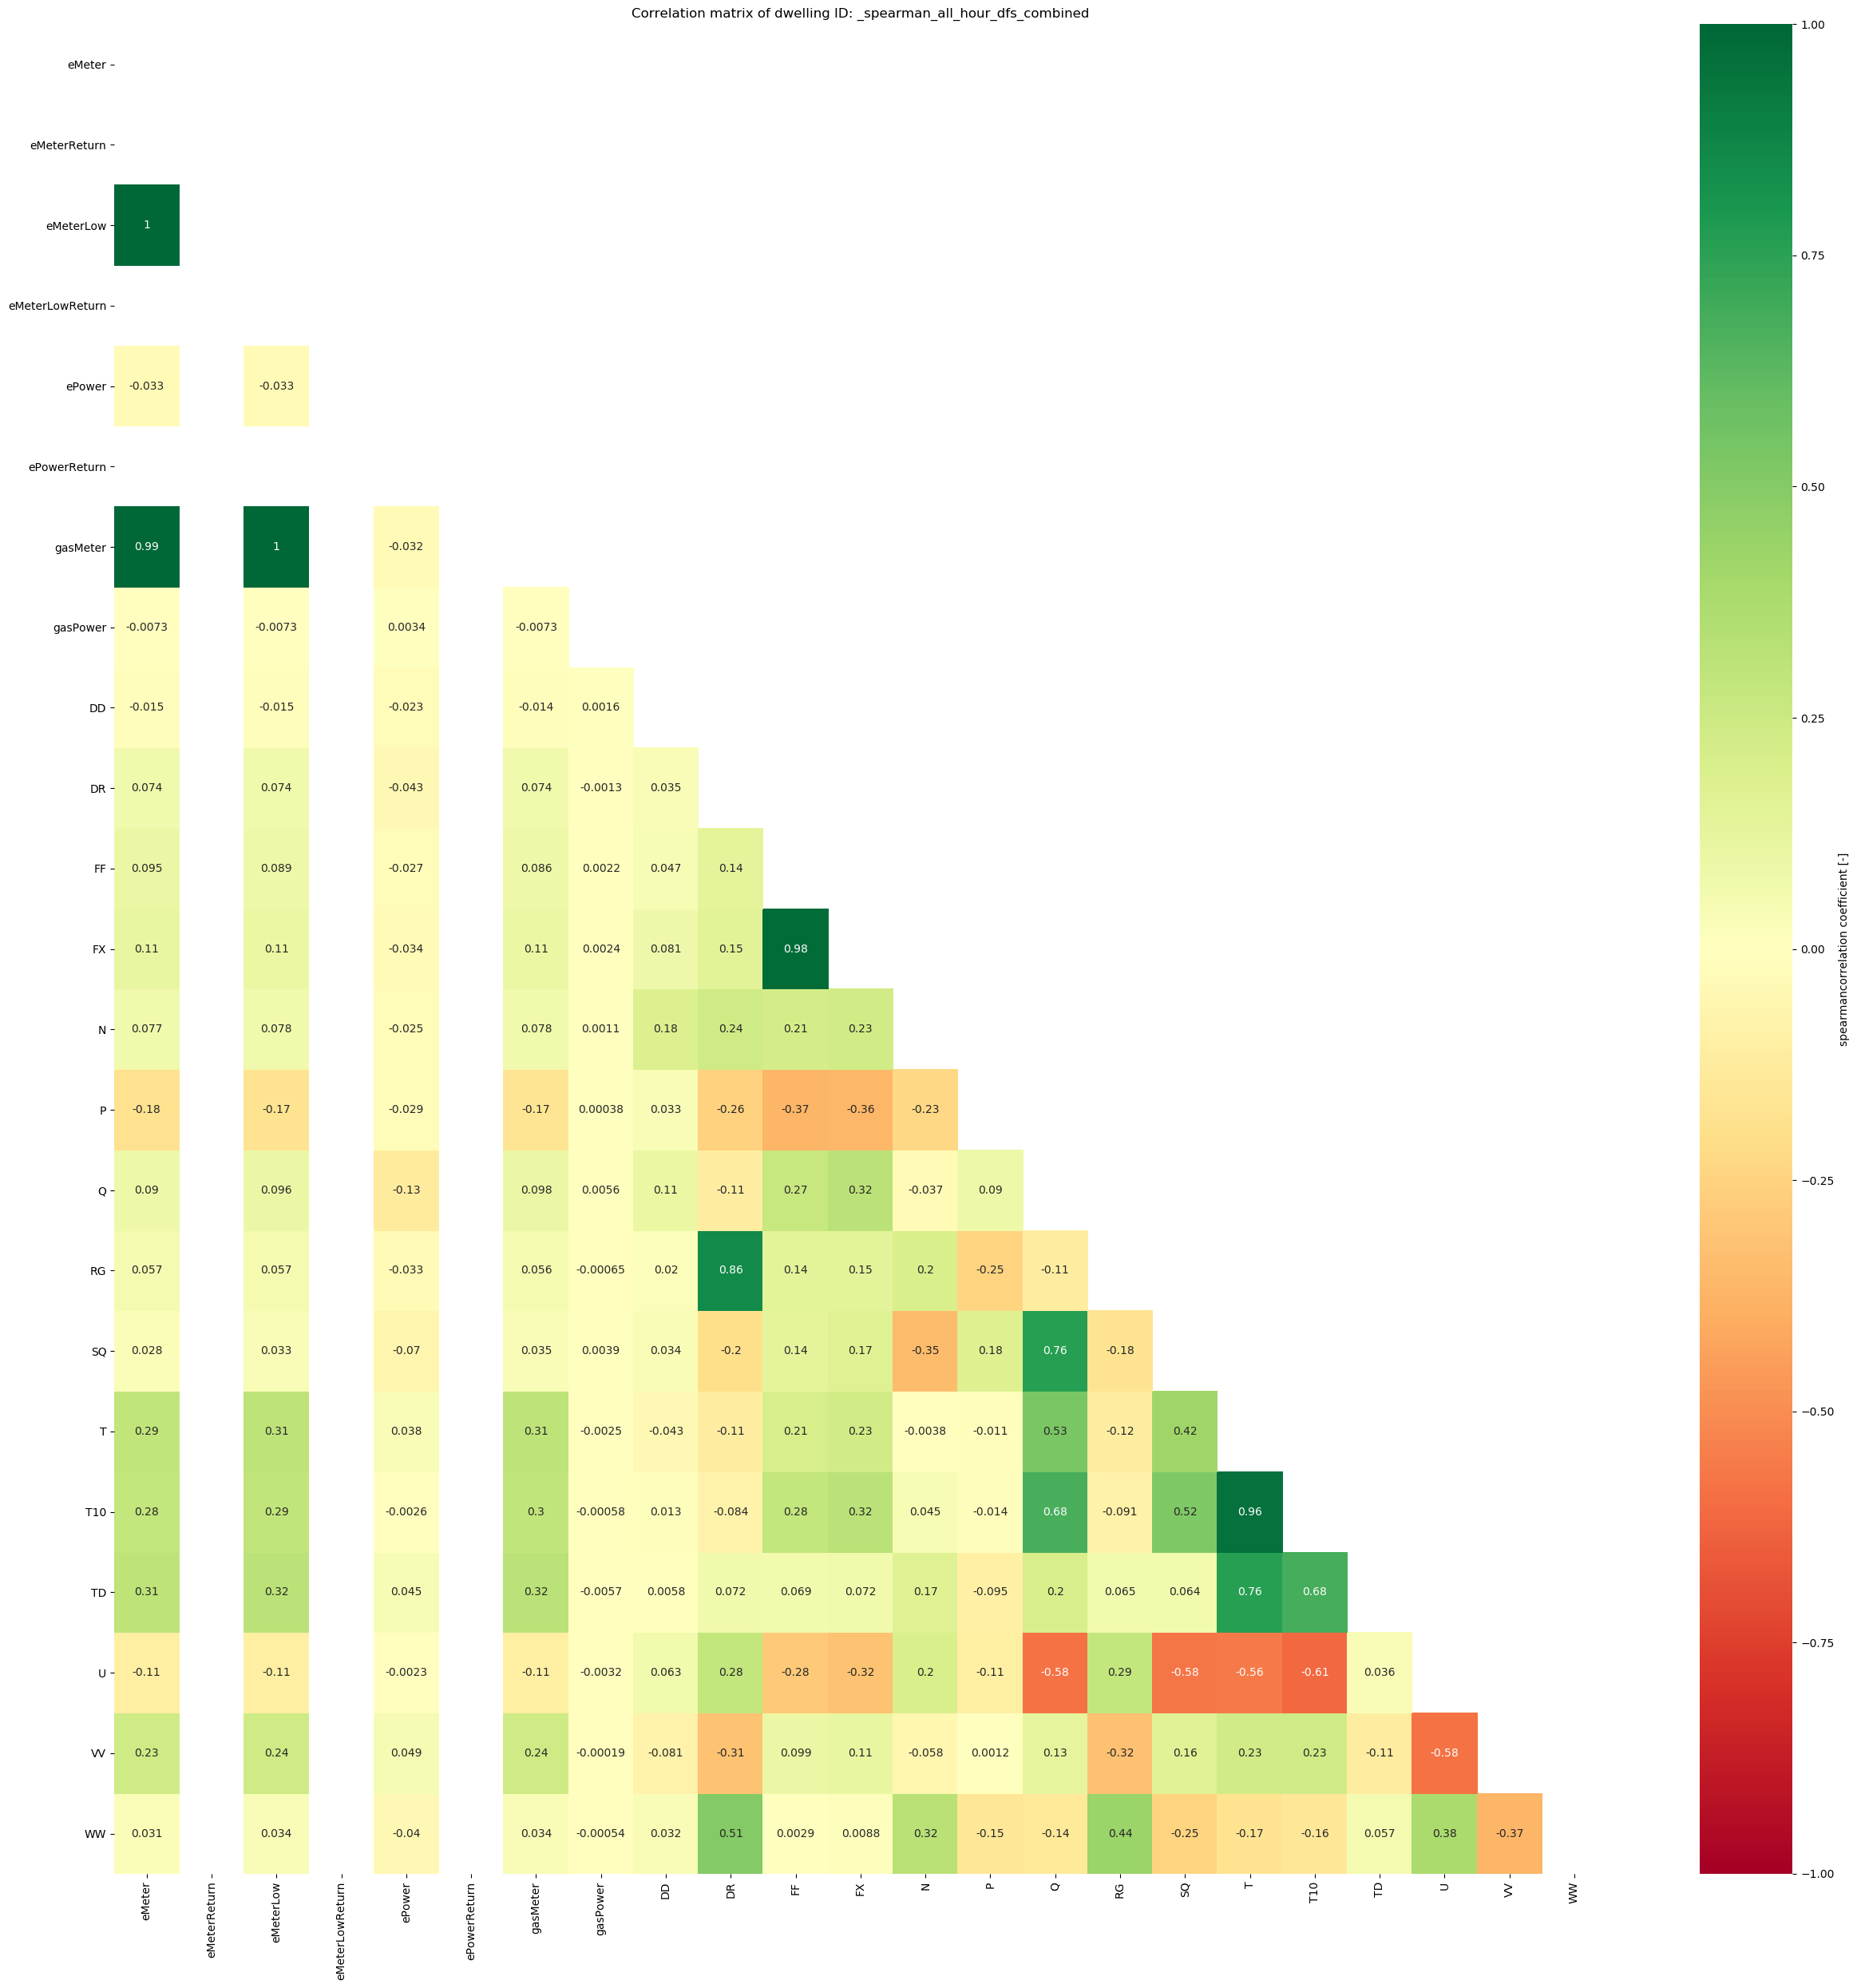

In [20]:
dwelling_id = ''
create_corr_matrix(s_merged, dwelling_id+'_spearman_all_hour_dfs_combined', 'spearman', False)
create_corr_matrix(s_merged, dwelling_id+'_spearman_all_hour_dfs_combined', 'spearman', True)

In [21]:
s_merged.memory_usage(index=True).sum() * 1*10**(-6) # memory usage in MB

6105.321488